In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from constants_functions import *

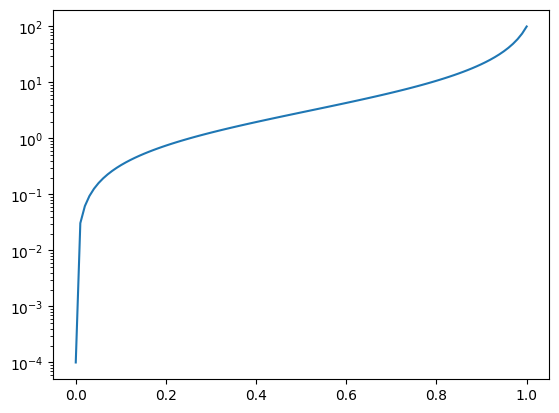

In [2]:
nbins = 100

ymin = 1e-4
ymax = 1e2
yext = 3.1
k1 = ymin/yext
k2 = ymax/yext
e2 = (1 + k1) / (k2 - k1)
e1 = k1 * (1 + e2)

def yspace(ymin, ymax, nbins):
    yext = 3.1
    k1 = ymin/yext
    k2 = ymax/yext
    e2 = (1 + k1) / (k2 - k1)
    e1 = k1 * (1 + e2)
    u = np.linspace(0, 1, nbins)
    return yext * (u + e1) / (1 + e2 - u)

def utoy(u):
    return yext * (u + e1) / (1 + e2 - u)

uspace = np.linspace(0, 1, nbins)
plt.semilogy(uspace, utoy(uspace))

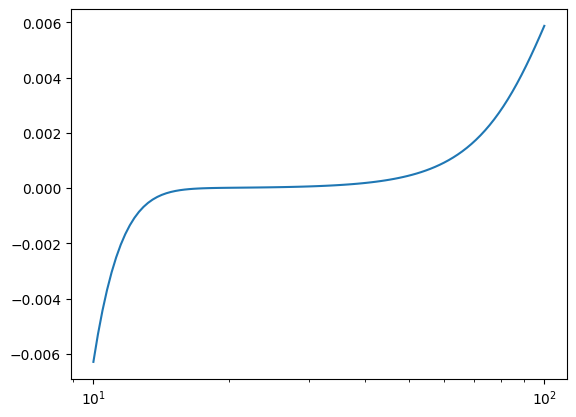

In [33]:
nbins = 50
rn = []
rang = np.logspace(1, 2, 100)
for m in rang:
    y = np.linspace(0.01, m, nbins)
    rn.append(rho_nu(y, 1))
rn = np.array(rn)
plt.semilogx(rang, rn - 3 * 7 / 120 * np.pi ** 2)

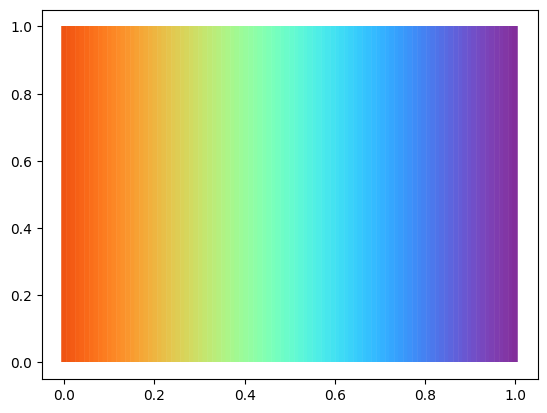

In [2]:
def guass(x, mu, sigma):
    return np.exp(-np.square((x-mu)/sigma)/2)

def red(x):
    return 0.99 * guass(x, 0.1, 0.3) + 0.5 * guass(x, 1, 0.15)

def green(x):
    return guass(x, 0.45, 0.3)

def blue(x):
    return guass(x, 0.7, 0.3)

def clr(x):
    return (red(x), green(x), blue(x))

rang = np.linspace(0, 1, 100)
clrs = [clr(x) for x in rang]
plt.vlines(rang, 0, 1, clrs, linewidth=4)
plt.show()

In [14]:
dm2 = 1e-3
yref = 25
(dm2 * m_W ** 2 / (8 * np.sqrt(2) * G_F * yref ** 2)) ** (1/6) * 1e-6

2.0685046153342994

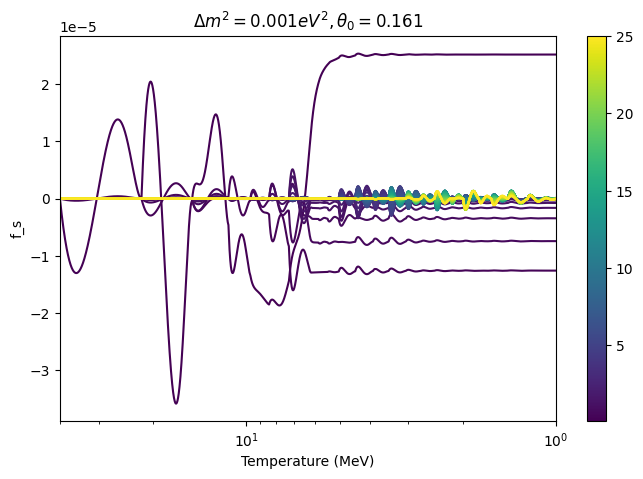

In [4]:
nbins = 100
ymin = 1e-1
ymax = 25
y_arr = np.linspace(ymin, ymax, nbins)
f0 = f_0(y_arr)

theta0 = 0.161
dm2 = 1e-3

filepath = f"/home/projects/sterilenuosc/results/dw_lsoda_n100_0.1_25_5.01e-02_1.00e-03.txt"
arr = np.loadtxt(filepath)
filepath2 = "/home/projects/sterilenuosc/results/dw_Radau_n100_0.1_25_5.01e-02_1.00e-03.txt"
arr2 = np.loadtxt(filepath2)
xs = arr[-1,:]
zs = arr[-2,:]

Pz = arr[nbins:2*nbins] - arr[0:nbins]
P0 = arr[nbins:2*nbins] + arr[0:nbins]
Ps = np.stack([P0, np.zeros_like(P0), np.zeros_like(P0), Pz])
Neffarr = np.array([Neff(y_arr, Ps[:,:,i].T.flatten(), f0) for i in range(len(Ps[0,0,:]))])

cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
fig, ax = plt.subplots(figsize = (8, 5))
plt.xlim(Tstart, Tend)
for i in range(nbins):
    # plt.semilogx(1e-6*m_e/xs, arr[i,:], linestyle='solid', color = colors[i], label='DW')
    plt.semilogx(1e-6*m_e/xs, arr[i,:]-arr2[i,:], linestyle='solid', color = colors[i], label='DW')
# plt.semilogx(1e-6*m_e/xs, Neffarr, linestyle='solid', color = 'tab:red', label='Neff')

# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(rf"$\Delta m^2 = {dm2} eV^2, \theta_0={theta0}$")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=ymin, vmax=ymax))
plt.colorbar(sm, ax=ax)

(100, 50)


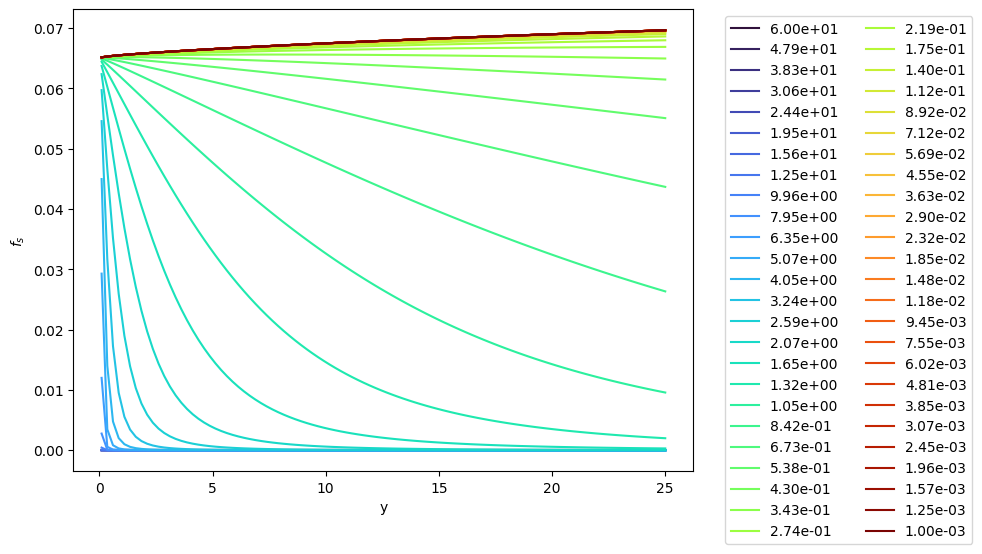

In [90]:
nbins = 100
ymin = 1e-1
ymax = 25
y_arr = np.linspace(ymin, ymax, nbins)
theta0 = 1.61e-1
dm2 = 1e-5

filepath = f"/home/projects/sterilenuosc/results/dw_uspace_n{nbins}_{ymin}_{ymax}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}.txt"
arr = np.loadtxt(filepath)
xs = arr[-1,:]
zs = arr[-2,:]

n_temps = 50
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
T_range = m_e/xs[np.round(np.linspace(0, len(xs)-1, n_temps)).astype(int)]
cmap = mpl.colormaps['turbo'] #[clr(i/n_temps) for i in range(n_temps)]
colors = cmap(np.linspace(0, 1, n_temps))

a = []
for i in range(nbins):
    a.append(arr[i, np.round(np.linspace(0, len(xs)-1, n_temps)).astype(int)])
a = np.array(a)
print(a.shape)

plt.figure(figsize=(8, 6))
for i in range(n_temps):
    # plt.semilogy(y_arr, a[:,i] / (np.exp(y_arr) + 1), color = colors[i], label = T_range[i]/1e6)
    plt.plot(y_arr, a[:,i], color = colors[i], label = '{:.2e}'.format(T_range[i]/1e6))
plt.xlabel("y")
plt.ylabel(r"$f_s$")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", ncols=2)

In [48]:
# y_arr = np.linspace(ymin, ymax, nbins)
y_arr = yspace(ymin, ymax, nbins)
f0 = f_0(y_arr)
Pf = [[arr[nbins+i,-1]+arr[i,-1], 0, 0, arr[nbins+i,-1]-arr[i,-1]] for i in range(nbins)]
Pf = np.array(Pf)
Pf = Pf.flatten()
Neff(y_arr, Pf, f0)

1.0086430625777119

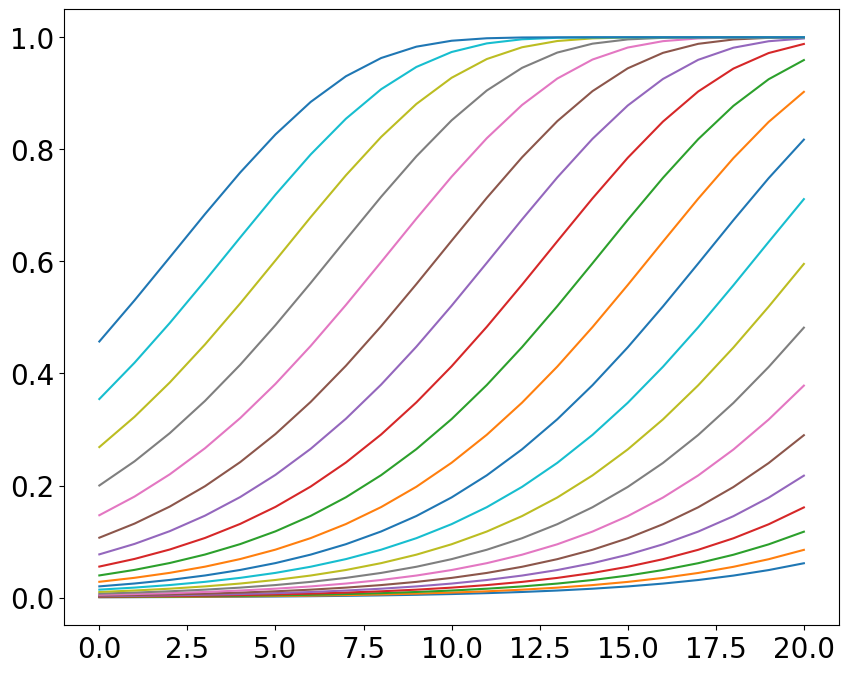

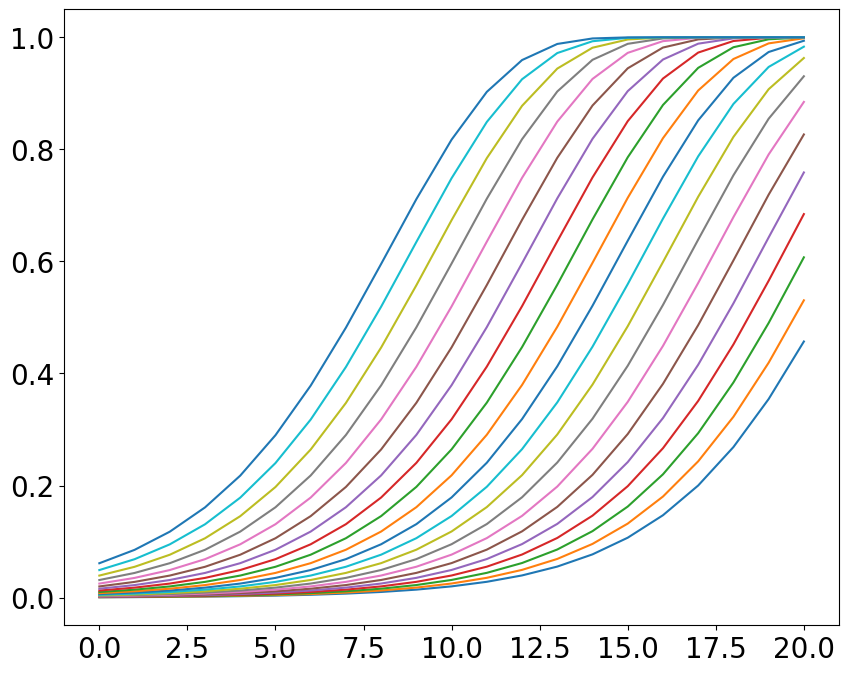

In [33]:
sinsqtwoth = np.logspace(-4, -1, 21)
dm2 = np.logspace(-3, 1, 21)

Neffs = np.loadtxt("/home/projects/sterilenuosc/results/posNeffs_precession")

Neffs = np.array(Neffs).reshape((21, 21))
plt.plot(Neffs)
plt.show()
plt.plot(Neffs.T)
plt.show()

(21,) (21,) (21, 21)


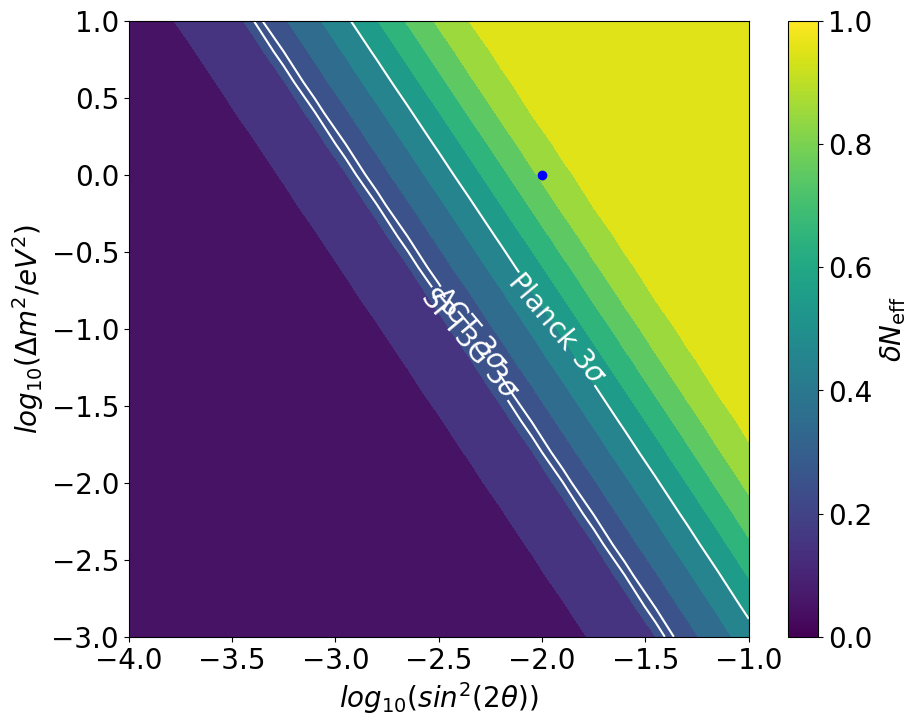

In [34]:
plt.rcParams.update({'font.size':20, 'figure.figsize':(10, 8)})

cmap = mpl.colormaps['viridis']
fig, ax = plt.subplots()
ax.set_xlim(-4, -1)
ax.set_ylim(-3, 1)
ax.set_xlabel(r"$log_{10}(sin^2(2 \theta))$")
ax.set_ylabel(r"$log_{10}(\Delta m^2/eV^2)$")
print(np.shape(sinsqtwoth), np.shape(dm2), Neffs.shape)
ax.contourf(np.log10(sinsqtwoth), np.log10(dm2), Neffs, levels=np.arange(0, 1.1, 0.1))

levels=[2.83+3*0.13-3, 2.46+3*0.26-3, 2.99+3*0.17-3]
labels=[r'SPT3G 3$\sigma$', r'ACT 3$\sigma$', r'Planck 3$\sigma$']
d = dict([(i, j) for i, j in zip(levels, labels)])
d = dict(sorted(d.items()))
colors=['w' for _ in range(len(levels))]
c = ax.contour(np.log10(sinsqtwoth), np.log10(dm2), Neffs, levels=list(d.keys()), colors=colors)
ax.clabel(c, c.levels, fmt=d)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$\delta N_\mathrm{eff}$")

ax.plot(-2, 0, 'bo')

(21,) (21,) (21, 21)


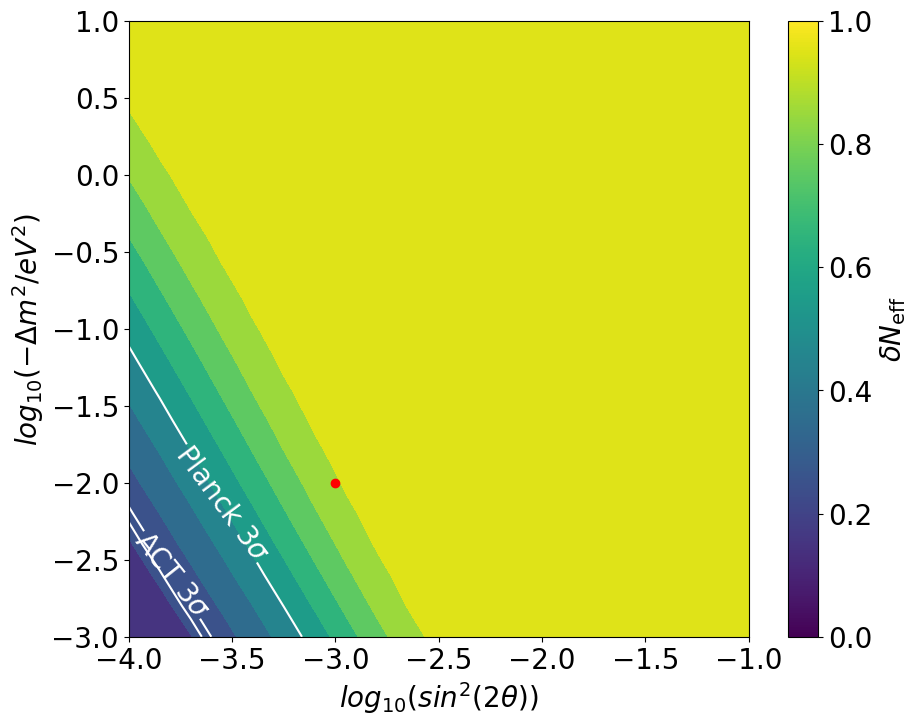

In [36]:
sinsqtwoth = np.logspace(-4, -1, 21)
dm2 = np.logspace(-3, 1, 21)

Neffs = np.loadtxt("/home/projects/sterilenuosc/results/negNeffs_precession")
Neffs = np.array(Neffs).reshape((21, 21))

cmap = mpl.colormaps['viridis']
fig, ax = plt.subplots()
ax.set_xlim(-4, -1)
ax.set_ylim(-3, 1)
ax.set_xlabel(r"$log_{10}(sin^2(2 \theta))$")
ax.set_ylabel(r"$log_{10}(-\Delta m^2/eV^2)$")
print(np.shape(sinsqtwoth), np.shape(dm2), Neffs.shape)
ax.contourf(np.log10(sinsqtwoth), np.log10(dm2), np.clip(Neffs, None, 1.), levels=np.arange(0, 1.1, 0.1))

levels=[2.83+3*0.13-3, 2.46+3*0.26-3, 2.99+3*0.17-3]
labels=[r'SPT3G 3$\sigma$', r'ACT 3$\sigma$', r'Planck 3$\sigma$']
d = dict([(i, j) for i, j in zip(levels, labels)])
d = dict(sorted(d.items()))
colors=['w' for _ in range(len(levels))]
c = ax.contour(np.log10(sinsqtwoth), np.log10(dm2), Neffs, levels=list(d.keys()), colors=colors)
ax.clabel(c, c.levels, fmt=d)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$\delta N_\mathrm{eff}$")

ax.plot(-3, -2, 'ro')

(21,) (21,) (21, 21)


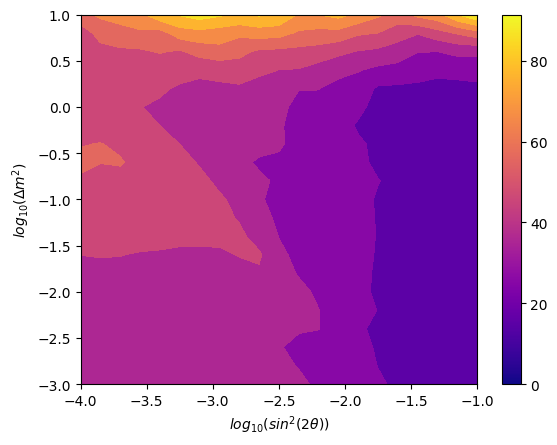

In [86]:
filepath = "/home/projects/sterilenuosc/outneg2.txt"

file = open(filepath, "r")

times = []
for line in file:
    l = line.split()
    if l[0] == 'factor:':
        times.append(l[7])
times = np.array(times).astype(float)
times = times.reshape(21, 21)

cmap = mpl.colormaps['plasma']
fig, ax = plt.subplots()
ax.set_xlim(-4, -1)
ax.set_ylim(-3, 1)
ax.set_xlabel(r"$log_{10}(sin^2(2 \theta))$")
ax.set_ylabel(r"$log_{10}(\Delta m^2)$")
print(np.shape(sinsqtwoth), np.shape(dm2), times.shape)
ax.contourf(np.log10(sinsqtwoth), np.log10(dm2), times, levels=np.linspace(0, np.max(times), 10), cmap=cmap)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=np.max(times)))
fig.colorbar(sm, ax=ax)

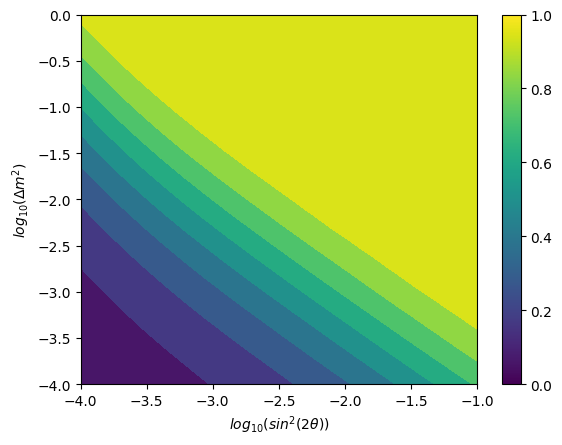

In [48]:
Neffs = []
sinsqtwoth = np.logspace(-1, -4, 20)
dm2 = np.logspace(0, -4, 20)

for s in sinsqtwoth:
    t = 0.5 * np.arcsin(np.sqrt(s))
    arr0 = np.loadtxt(f"/home/projects/sterilenuosc/results/Neffs_negative/neg_dm2_Neffs{t}_0.txt")
    arr1 = np.loadtxt(f"/home/projects/sterilenuosc/results/Neffs_negative/neg_dm2_Neffs{t}_1.txt")
    arr = np.concatenate([arr0, arr1])
    Neffs.append(arr)

Neffs = np.array(Neffs).reshape((20, 20)).T

cmap = mpl.colormaps['viridis']
fig, ax = plt.subplots()
ax.set_xlabel(r"$log_{10}(sin^2(2 \theta))$")
ax.set_ylabel(r"$log_{10}(\Delta m^2)$")
ax.contourf(np.log10(sinsqtwoth), np.log10(dm2), Neffs, np.linspace(0, 1, 10), vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
fig.colorbar(sm, ax=ax)

In [ ]:
filepath = "/home/projects/sterilenuosc/outhighneg.txt"
file = open(filepath, "r")

counts = []
temps = []
for line in file:
    l = line.split()
    if l[0] == 'counter:' and len(l) == 3:
        counts.append(l[1][:-1])
        temps.append(l[2][2:])
counts = np.array(counts).astype(int)
temps = np.array(temps).astype(float)

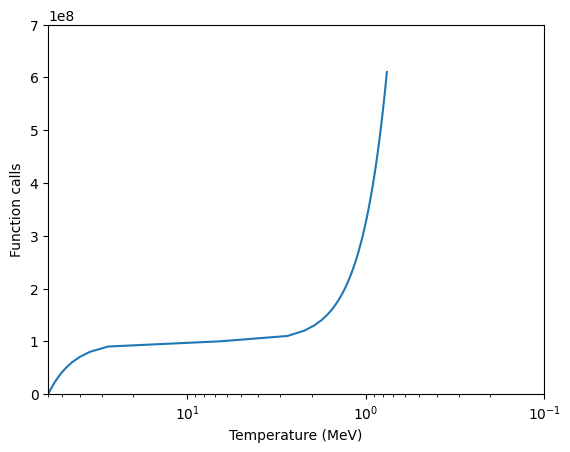

In [64]:
plt.ylabel("Function calls")
plt.xlabel("Temperature (MeV)")
plt.xlim([60, 0.1])
plt.ylim([0, 7e8])
plt.semilogx(temps[::100], counts[::100])

In [12]:
print(min(m_e/np.logspace(6+np.log10(2), 6, 10000)[1:]-m_e/np.logspace(6+np.log10(2), 6, 10000)[:-1]))
print(min(1/np.logspace(6+np.log10(2), 6, 10000)[1:]-1/np.logspace(6+np.log10(2), 6, 10000)[:-1])*m_e)

1.7712259152091736e-05
1.771225915205966e-05


In [15]:
(m_e/(m_e/1e6+1.77e-5)/1e6) ** 1e4

0.707247671835105

(82, 40000) (82, 10000)
0.06201635636547651


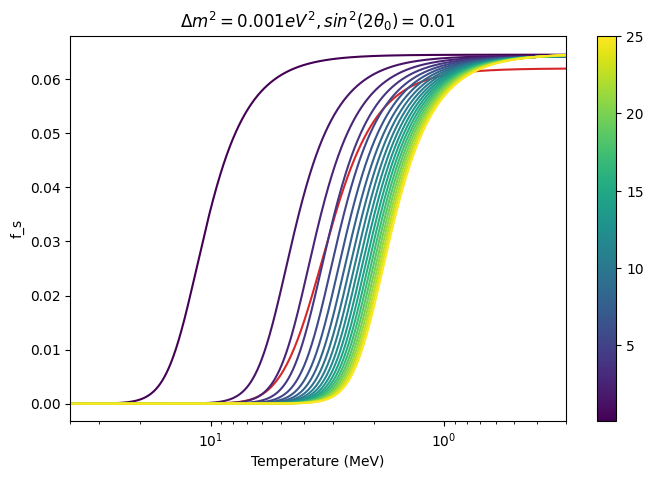

In [ ]:
sstt = 1e-2
theta0 = 0.5*np.arcsin(np.sqrt(sstt))
dm2 = 1e-3

minstep=1e-16
binning=0
# file1 = f"/home/projects/sterilenuosc/results/minstep{minstep}_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage2.00e+06.txt"
# file2 = f"/home/projects/sterilenuosc/results/minstep{minstep}_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"
# file3 = f"/home/projects/sterilenuosc/results/minstep{minstep}_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage3.00e+05.txt"
# file4 = f"/home/projects/sterilenuosc/results/minstep{minstep}_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.50e+05.txt"

file1 = f"/home/projects/sterilenuosc/results/archive/precessionRadau_binning0_5.01e-02_1.00e-03_stage2.00e+06.txt"
file2 = f"/home/projects/sterilenuosc/results/archive/precessionRadau_binning0_5.01e-02_1.00e-03_stage1.00e+06.txt"
file3 = f"/home/projects/sterilenuosc/results/archive/precessionRadau_binning0_5.01e-02_1.00e-03_stage3.00e+05.txt"
file4 = f"/home/projects/sterilenuosc/results/archive/precessionRadau_binning0_5.01e-02_1.00e-03_stage1.50e+05.txt"

# file1 = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage2.00e+06.txt"
# file2 = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"
# file3 = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage3.00e+05.txt"

arr1 = np.loadtxt(file1)
arr2 = np.loadtxt(file2)
arr3 = np.loadtxt(file3)
arr4 = np.loadtxt(file4)


arr = np.concatenate([arr1, arr2, arr3, arr4], axis=-1)
xs = arr[0,:]
zs = arr[-1,:]
nbins=20
print(arr.shape, arr1.shape)

ymin = 1e-1
ymax = 25
if nbins == 1:
    y_arr = np.array([3.15])
elif binning:
    y_arr = np.concatenate([[ymin, 1], np.linspace(2, 25, 8)])
else:
    y_arr = np.linspace(ymin, 25, nbins)
# y_arr = np.linspace(ymin, ymax, nbins)
f0 = f_0(y_arr)


Ps = arr[1:-1,:]

Neffarr = np.array([Neff(y_arr, Ps[:,i].T.flatten(), f0) for i in range(len(Ps[0,:]))])
print(Neffarr[-1])

def H(x, P0_arr, z):
    rho = (2 * rho_e(x, z) + rho_nu(y_arr, P0_arr) + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)
# Harr = np.array([H(xs[i], Ps[0::4,i].T.flatten(), zs[i]) for i in range(len(Ps[0,:]))])

cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
fig, ax = plt.subplots(figsize = (8, 5))
plt.xlim(Tstart, Tend)

plt.semilogx(1e-6*m_e/xs, Neffarr, linestyle='solid', color = 'tab:red', label='Neff')

# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(rf"$\Delta m^2 = {dm2} eV^2, sin^2(2\theta_0)={sstt}$")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=ymin, vmax=ymax))
plt.colorbar(sm, ax=ax)

plt.xlim([4e1, 3e-1])
for i in range(nbins):
    P0s = arr[4*i+1,:]
    Pxs = arr[4*i+2,:]
    Pys = arr[4*i+3,:]
    Pzs = arr[4*i+4,:]
    plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color=colors[i])

# plt.semilogx(1e-6*m_e/xs, (zs-1), color='k')
# plt.semilogx(1e-6*m_e/xs, xs*Harr, color='k')
plt.show()

(42, 20000) (42, 10000)
0.060819448021264655


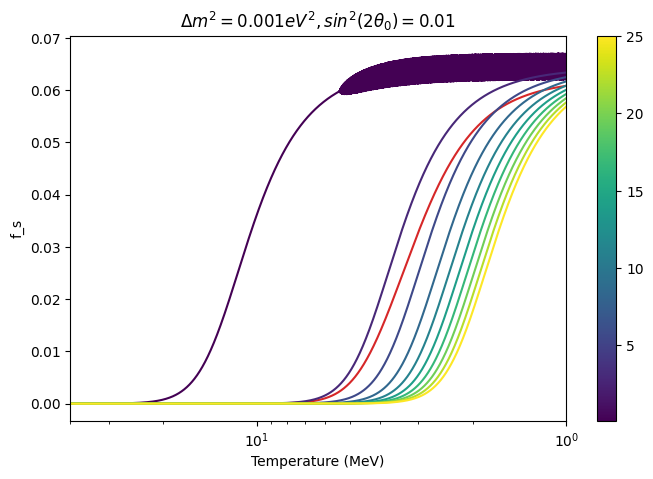

In [6]:
sstt = 1e-2
theta0 = 0.5*np.arcsin(np.sqrt(sstt))
dm2 = 1e-3

file1 = f"/home/projects/sterilenuosc/results/old_rk45/precession_ymin0.1_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+07.txt"
file2 = f"/home/projects/sterilenuosc/results/old_rk45/precession_ymin0.1_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"
# file3 = "/home/projects/sterilenuosc/results/precession_ymin0.1_5.01e-02_1.00e-12_stage1.00e+05.txt"

arr1 = np.loadtxt(file1)
arr2 = np.loadtxt(file2)
# arr3 = np.loadtxt(file3)

arr = np.concatenate([arr1, arr2], axis=-1)
xs = arr[0,:]
zs = arr[-1,:]
nbins=10
print(arr.shape, arr1.shape)

ymin = 1e-1
ymax = 25
y_arr = np.linspace(ymin, ymax, nbins)
f0 = f_0(y_arr)


Ps = arr[1:-1,:]

Neffarr = np.array([Neff(y_arr, Ps[:,i].T.flatten(), f0) for i in range(len(Ps[0,:]))])
print(Neffarr[-1])

def H(x, P0_arr, z):
    rho = (2 * rho_e(x, z) + rho_nu(y_arr, P0_arr) + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)
# Harr = np.array([H(xs[i], Ps[0::4,i].T.flatten(), zs[i]) for i in range(len(Ps[0,:]))])

cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
fig, ax = plt.subplots(figsize = (8, 5))
plt.xlim(Tstart, Tend)

plt.semilogx(1e-6*m_e/xs, Neffarr, linestyle='solid', color = 'tab:red', label='Neff')

# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(rf"$\Delta m^2 = {dm2} eV^2, sin^2(2\theta_0)={sstt}$")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=ymin, vmax=ymax))
plt.colorbar(sm, ax=ax)

plt.xlim([4e1, 1e0])
for i in range(nbins):
    P0s = arr[4*i+1,:]
    Pxs = arr[4*i+2,:]
    Pys = arr[4*i+3,:]
    Pzs = arr[4*i+4,:]
    plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color=colors[i])

# plt.semilogx(1e-6*m_e/xs, (zs-1), color='k')
# plt.semilogx(1e-6*m_e/xs, xs*Harr, color='k')
plt.show()

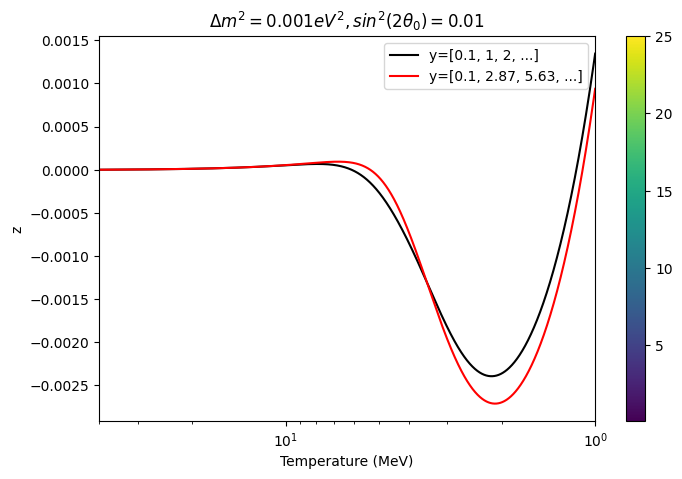

In [10]:
sstt = 1e-2
theta0 = 0.5*np.arcsin(np.sqrt(sstt))
dm2 = 1e-3

file1 = f"/home/projects/sterilenuosc/results/precession_binning1_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage2.00e+06.txt"
file2 = f"/home/projects/sterilenuosc/results/precession_binning1_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"

file3 = f"/home/projects/sterilenuosc/results/precession_binning0_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage2.00e+06.txt"
file4 = f"/home/projects/sterilenuosc/results/precession_binning0_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"

arr1 = np.loadtxt(file1)
arr2 = np.loadtxt(file2)
arr3 = np.loadtxt(file3)
arr4 = np.loadtxt(file4)

arr = np.concatenate([arr1, arr2], axis=-1)
arrr = np.concatenate([arr3, arr4], axis=-1)
xs = arr[0,:]
zs = arr[-1,:]
zss = arrr[-1,:]
nbins=10

ymin = 1e-1
ymax = 25
y_arr = np.linspace(ymin, ymax, nbins)
f0 = f_0(y_arr)


Ps = arr[1:-1,:]

Neffarr = np.array([Neff(y_arr, Ps[:,i].T.flatten(), f0) for i in range(len(Ps[0,:]))])
cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
fig, ax = plt.subplots(figsize = (8, 5))
plt.xlim(Tstart, Tend)


# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"z")
plt.title(rf"$\Delta m^2 = {dm2} eV^2, sin^2(2\theta_0)={sstt}$")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=ymin, vmax=ymax))
plt.colorbar(sm, ax=ax)

plt.xlim([4e1, 1e0])

# for i in range(nbins):
#     P0s = arr[4*i+1,:]
#     Pxs = arr[4*i+2,:]
#     Pys = arr[4*i+3,:]
#     Pzs = arr[4*i+4,:]
#     plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color=colors[i])

plt.semilogx(1e-6*m_e/xs, (zs-1), color='k', label=r'y=[0.1, 1, 2, ...]')
plt.semilogx(1e-6*m_e/xs, (zss-1), color='r', label=r'y=[0.1, 2.87, 5.63, ...]')
plt.legend()
plt.show()

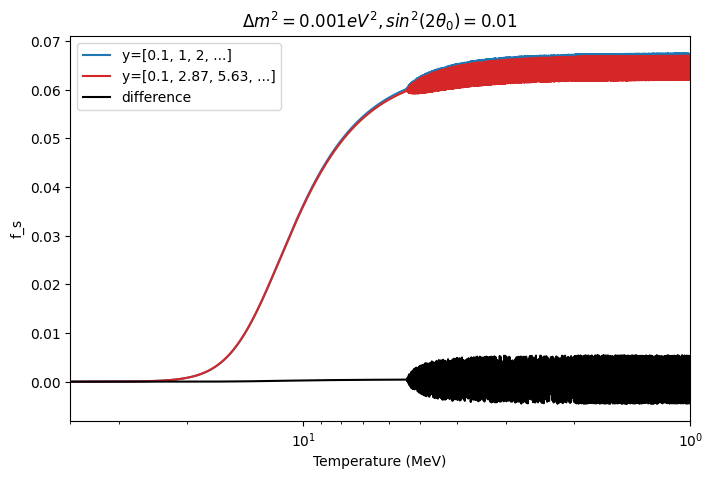

In [23]:
sstt = 1e-2
theta0 = 0.5*np.arcsin(np.sqrt(sstt))
dm2 = 1e-3

file1 = f"/home/projects/sterilenuosc/results/precession_binning1_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage2.00e+06.txt"
file2 = f"/home/projects/sterilenuosc/results/precession_binning1_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"

file3 = f"/home/projects/sterilenuosc/results/precession_binning0_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage2.00e+06.txt"
file4 = f"/home/projects/sterilenuosc/results/precession_binning0_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage1.00e+06.txt"

arr1 = np.loadtxt(file1)
arr2 = np.loadtxt(file2)
arr3 = np.loadtxt(file3)
arr4 = np.loadtxt(file4)

arr = np.concatenate([arr1, arr2], axis=-1)
arrr = np.concatenate([arr3, arr4], axis=-1)
xs = arr[0,:]
nbins=10
ymin = 1e-1
ymax = 25

cmap = mpl.colormaps['viridis']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
fig, ax = plt.subplots(figsize = (8, 5))
plt.xlim(Tstart, Tend)


plt.xlabel("Temperature (MeV)")
plt.ylabel(r"f_s")
plt.title(rf"$\Delta m^2 = {dm2} eV^2, sin^2(2\theta_0)={sstt}$")
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=ymin, vmax=ymax))
# plt.colorbar(sm, ax=ax)

plt.xlim([4e1, 1e0])

for i in range(1):
    P0s = arr[4*i+1,:]
    Pxs = arr[4*i+2,:]
    Pys = arr[4*i+3,:]
    Pzs = arr[4*i+4,:]

    P0ss = arrr[4*i+1,:]
    Pxss = arrr[4*i+2,:]
    Pyss = arrr[4*i+3,:]
    Pzss = arrr[4*i+4,:]
    plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color='tab:blue', label='y=[0.1, 1, 2, ...]')
    plt.semilogx(1e-6*m_e/xs, (P0ss-Pzss)/2, color='tab:red', label='y=[0.1, 2.87, 5.63, ...]')
    plt.semilogx(1e-6*m_e/xs, (P0s-P0ss-Pzs+Pzss)/2, color='k', label='difference')

plt.legend()
plt.show()

In [ ]:
T_end = 1e5
nbins=20
dm21 = -1e-3
sstt1 = 1e-2
theta01 = 0.5 * np.arcsin(np.sqrt(sstt1)) 
dm22 = 1e-0
sstt2 = 1e-2
theta02 = 0.5 * np.arcsin(np.sqrt(sstt2)) 
binning=0

ymin = 1e-1
ymax = 25
y_arr = np.linspace(ymin, ymax, nbins)
f0 = f_0(y_arr)

dwpath1 = f"/home/projects/sterilenuosc/results/dw_Radau_n{nbins}_{ymin}_{ymax}_{'{:.2e}'.format(theta01)}_{'{:.2e}'.format(dm21)}.txt"
qkepath1 = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta01)}_{'{:.2e}'.format(dm21)}_stage{'{:.2e}'.format(T_end)}.txt"

dwarr1 = np.loadtxt(dwpath1)

effs1 = dwarr1[:,:]

qkearr1 = np.loadtxt(qkepath1)

xs1 = qkearr1[0,:]
Ps1 = qkearr1[1:-1,:]

dwpath2 = f"/home/projects/sterilenuosc/results/dw_Radau_n{nbins}_{ymin}_{ymax}_{'{:.2e}'.format(theta02)}_{'{:.2e}'.format(dm22)}.txt"
qkepath2 = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta02)}_{'{:.2e}'.format(dm22)}_stage{'{:.2e}'.format(T_end)}.txt"

dwarr2 = np.loadtxt(dwpath2)

effs2 = dwarr2[:,:]

qkearr2 = np.loadtxt(qkepath2)

xs2 = qkearr2[0,:]
Ps2 = qkearr2[1:-1,:]



Neffarr = np.array([Neff(y_arr, Ps1[:,i].T.flatten(), f0) for i in range(len(Ps1[0,:]))])
print(Neffarr[-1])

plt.rcParams.update({'font.size':20, 'figure.figsize':(10, 6)})

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs1)
Tend = min(1e-6*m_e/xs1)
fig, ax = plt.subplots(figsize = (10, 6))
plt.xlim(Tstart, 1e0)

# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"$f_s$")
# plt.title(rf"$\Delta m^2 = {dm2} eV^2, sin^2(2\theta_0)={sstt}$")
plt.title("Neutrino population evolution")
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=2*ymin-ymax, vmax=ymax))
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label("Momentum (y)")

for i in [2]: #range(nbins):
    P0s1 = Ps1[4*i,:]
    Pxs1 = Ps1[4*i+1,:]
    Pys1 = Ps1[4*i+2,:]
    Pzs1 = Ps1[4*i+3,:]
    fs1 = effs1[i,:]
    plt.semilogx(1e-6*m_e/xs1, fs1, color='tab:red', linestyle='dashed', linewidth=3)
    plt.semilogx(1e-6*m_e/xs1, (P0s1-Pzs1)/2, color='tab:red', linewidth=3)

    P0s2 = Ps2[4*i,:]
    Pxs2 = Ps2[4*i+1,:]
    Pys2 = Ps2[4*i+2,:]
    Pzs2 = Ps2[4*i+3,:]
    fs2 = effs2[i,:]
    plt.semilogx(1e-6*m_e/xs1, fs2, color='tab:blue', linestyle='dashed', linewidth=3)
    plt.semilogx(1e-6*m_e/xs1, (P0s2-Pzs2)[::100]/2, color='tab:blue', linewidth=3)

    # plt.plot([], [], linestyle='solid', color='k', label='QKE')
    # plt.plot([], [], linestyle='dashed', color='k', label='Dodelson-Widrow')
    # plt.semilogx(1e-6*m_e/xs, np.abs((P0s-Pzs)/2-fs)/fs, color=colors[i])
    # plt.semilogx(1e-6*m_e/xs1, (P0s1-Pzs1)/2, color=colors[i], linewidth=4)

# plt.semilogx(1e-6*m_e/xs, Neffarr, linestyle='solid', color = 'tab:red', label='Neff')
plt.legend()

In [ ]:
fpath="/home/projects/sterilenuosc/graph/prettybackground.png"
plt.savefig(fpath, transparent=True, edgecolor='auto')

<Figure size 640x480 with 0 Axes>

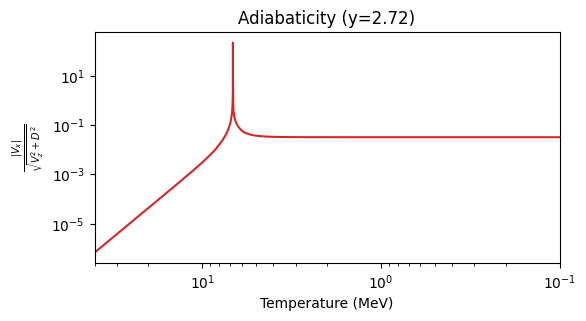

In [ ]:
T_end = 1e5
nbins = 20
dm2 = -1e-2
sstt = 1e-3
theta0 = 0.5 * np.arcsin(np.sqrt(sstt)) 
binning=0

ymin = 1e-1
ymax = 25
y_arr = np.linspace(ymin, ymax, nbins)
f0 = f_0(y_arr)

def H(x, P0_arr, z):
    rho = (2 * rho_e(x, z) + rho_nu(y_arr, P0_arr) + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)

# y is replaced by 1! be sure to multiply back at the end

def l(x, z, H_x): # nondimensionalize 
    const = 2 * np.sqrt(2) * G_F / (x * H_x) * 1 * (m_e / x) ** 5 / (m_W ** 2)
    var = 2 * (rho_e(x, z) + P_e(x, z))
    return np.array([0, 0, -var * const])

def b(x, H_x): # constant (vacuum term)
    theta = theta0
    const = dm2 / (x * H_x) * (x / m_e) / (2 * 1)
    return const * np.array([np.sin(2*theta), 0, -np.cos(2*theta)])

def Gamma_e(x, z):
    return C_e * G_F ** 2 * 1 * (m_e/x) ** 5 * z ** 5

qkepath = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage{'{:.2e}'.format(T_end)}.txt"

qkearr = np.loadtxt(qkepath)

xs = qkearr[0,:]
zs = qkearr[-1,:]
Ps = qkearr[1:-1,:]

gamma_e = Gamma_e(xs, zs)

cmap = mpl.colormaps['tab20']
colors = cmap(np.linspace(0, 1, nbins))
Tstart = max(1e-6*m_e/xs)
Tend = min(1e-6*m_e/xs)
fig, ax = plt.subplots(figsize = (6, 3))
plt.xlim(Tstart, Tend)

# plt.legend(loc="best")
plt.xlabel("Temperature (MeV)")
# plt.ylabel(r"cos($\theta$)")
plt.ylabel(r"$\frac{|V_x|}{\sqrt{V_z^2+D^2}}$")
# plt.title(rf"$\Delta m^2 = {dm2} eV^2, sin^2(2\theta_0)={sstt}$")
plt.title("Adiabaticity")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=ymin, vmax=ymax))
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label("y")
# plt.ylim(-1, 1)

for i in [2]: #range(nbins):
    P0s = Ps[np.arange(0, nbins*4, 4),:]
    Pvec = Ps[4*i+1:4*i+4, :].T
    
    hubble = np.array([H(xs[j], P0s[:,j], zs[j]) for j in range(len(xs))])
    bs = np.array([b(xs[j], hubble[j]) for j in range(len(xs))])
    ls = np.array([l(xs[j], zs[j], hubble[j]) for j in range(len(xs))])
    vec = bs / y_arr[i] + ls * y_arr[i]
    # plt.loglog(1e-6*m_e/xs, np.linalg.norm(vec, axis=1), color=colors[i])

    cost = np.einsum('ik,ik->i',Pvec,vec)/(np.linalg.norm(vec, axis=1) * np.linalg.norm(Pvec, axis=1))
    # plt.semilogx(1e-6*m_e/xs, cost, color=colors[i])
    
    D = 0.5 * gamma_e * y_arr[i]
    plt.loglog(1e-6*m_e/xs, np.abs(vec[:,0]) / np.sqrt(vec[:,2] ** 2 + D ** 2), color='tab:red')

plt.show()

In [20]:
print(np.linspace(0.1, 25, 20)[2])

2.721052631578947


In [86]:
T_end = 1e5
nbins = 20
dm2 = 1e-0
sstt = 1e-2
theta0 = 0.5 * np.arcsin(np.sqrt(sstt)) 
binning=0

y_arr = np.linspace(0.1, 25, 20)
y = y_arr[2]

qkepath = f"/home/projects/sterilenuosc/results/precession_binning{binning}_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}_stage{'{:.2e}'.format(T_end)}.txt"

qkearr = np.loadtxt(qkepath)

xs = qkearr[0,:]
zs = qkearr[-1,:]
Ps = qkearr[1:-1,:]
P0s = Ps[np.arange(0, nbins*4, 4),:]

Lambda = np.array([4 * np.sqrt(2) * G_F * y ** 2 / (m_W ** 2) * (m_e/xs[i]) ** 6 * (rho_e(xs[i], zs[i]) + P_e(xs[i], zs[i])) for i in range(len(xs))])

dLambda = np.gradient(Lambda, xs)

dm2M = np.sqrt((dm2 * np.sin(2 * theta0)) ** 2 + (dm2 * np.cos(2 * theta0) + Lambda) ** 2)

thetaM = 0.5 * np.arctan(np.tan(2 * theta0) / (1 + Lambda / (dm2 * np.cos(2 * theta0))))

def H(x, P0_arr, z):
    rho = (2 * rho_e(x, z) + rho_nu(y_arr, P0_arr) + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)

hubble = np.array([H(xs[i], P0s[:,i], zs[i]) for i in range(len(xs))])

adia2 = (dm2M ** 2) / (2 * y * np.sin(2 * thetaM) * m_e * hubble * np.abs(dLambda))

Text(0.5, 1.0, 'Adiabaticity')

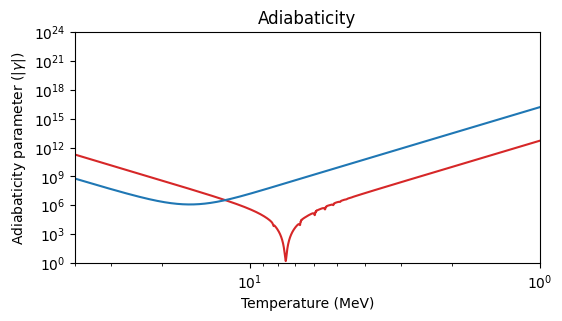

In [95]:
plt.rcParams['figure.figsize'] = (6, 3)
plt.xlim(4e1, 1e0)
plt.ylim(1e0, 1e24)
plt.loglog(1e-6*m_e/xs, np.abs(adia1), color='tab:red')
plt.loglog(1e-6*m_e/xs, np.abs(adia2), color='tab:blue')
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"Adiabaticity parameter ($|\gamma|$)")
# plt.ylabel(r"$\theta_M$")
plt.title(rf"Adiabaticity")

In [96]:
min(np.abs(adia1))

1.621295693407376

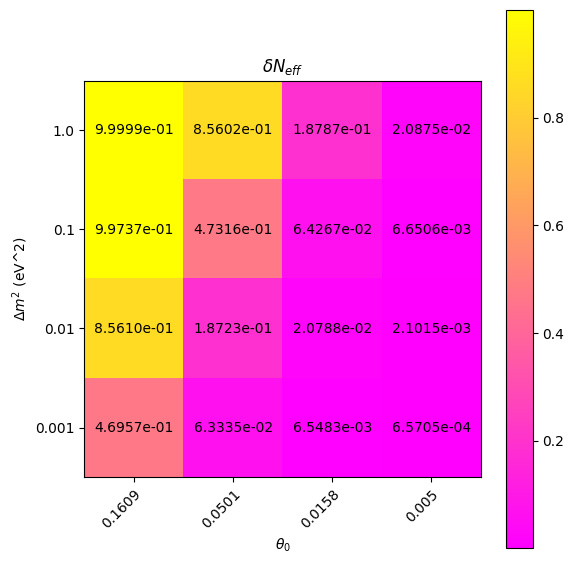

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Neffs.reshape((4,4)), cmap='spring')
# im = ax.imshow(np.log(Neffs.reshape((4,4))), cmap='spring')

thetas = 0.5 * np.arcsin(np.sqrt(np.array([1e-1, 1e-2, 1e-3, 1e-4])))
dm2s = [1e0, 1e-1, 1e-2, 1e-3]
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(thetas)), labels=np.round(thetas, 4))
ax.set_yticks(np.arange(len(dm2s)), labels=dm2s)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(dm2s)):
    for j in range(len(thetas)):
        text = ax.text(j, i, '{:.4e}'.format(Neffs[4*i+j]),
                       ha="center", va="center", color="k")
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\Delta m^2$ (eV^2)")
ax.set_title(r"$\delta N_{eff}$")
plt.colorbar(im)
fig.tight_layout()
plt.show()

In [37]:
for nbins in [10, 20, 40, 100, 1000, 10000, 100000, 1000000]:
    start_time = time.time()
    y_arr = np.linspace(0.1, 25, nbins)
    for _ in range(1000):
        rho_nu(y_arr, 1)
    print(nbins)
    print(time.time()-start_time)

10
0.023221731185913086
20
0.016670703887939453
40
0.014577865600585938
100
0.013020992279052734
1000
0.0225522518157959
10000
0.10922122001647949
100000
1.0961291790008545
1000000
9.996202945709229


In [34]:
nbins = 10
y = np.linspace(0.1, 25, nbins)
f0 = f_0(y)
# P = arr[1:41,0]
theta_i = 0
# P = np.array([1, np.sin(theta_i), 0, np.cos(theta_i)] * nbins)
P = np.array([2, 0, 0, 0] * nbins)
print(Neff(y, P, f0))

1.0035032008274194


(4, 100, 10000)
3.622550663063026


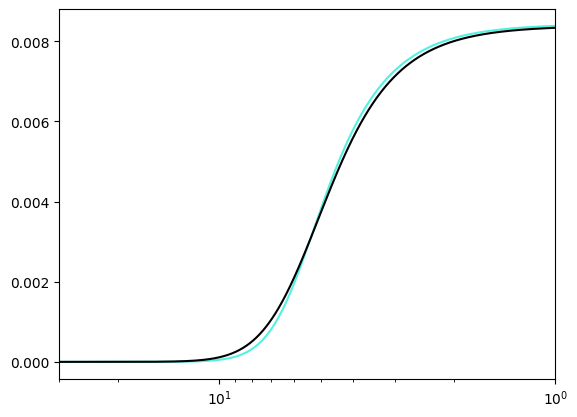

In [56]:
nbins = 100
theta0 = 0.01
dm2 = 0.01
y_arr = yspace(ymin, ymax, nbins)
f0 = f_0(y_arr)
filepath = f"/home/projects/sterilenuosc/results/dw_uspace_n{nbins}_0.1_25_{'{:.2e}'.format(theta0)}_{'{:.2e}'.format(dm2)}.txt"
arr = np.loadtxt(filepath)
xs = arr[-1,:]
zs = arr[-2,:]
Pz = arr[100:200] - arr[0:100]
P0 = arr[100:200] + arr[0:100]
Ps = np.stack([P0, np.zeros_like(P0), np.zeros_like(P0), Pz])
print(Ps.shape)
plt.xlim([30, 1])

colors = [clr(i/nbins) for i in range(nbins)]
for i in [55]:
    plt.semilogx(1e-6 * m_e/xs, (Ps[0,i,:]-Ps[3,i,:])/2, color=colors[i])

Neffarr = np.array([Neff(y_arr, Ps[:,:,i].T.flatten(), f0) for i in range(10000)])
plt.semilogx(1e-6 * m_e/xs, Neffarr, color='k')
print(y_arr[55])

In [51]:
@jit(nopython=True, cache=True)
def intj(x, t): 
    return (np.exp(np.sqrt(np.square(x) + np.square(t)))) / (((np.exp(np.sqrt(np.square(x) + np.square(t)))) + 1) ** 2)

def j(t):
    result, err = quad(intj, 0, 50, args=(t))
    return 1 / np.pi ** 2 * result

start_time = time.time()
for _ in range(100000):
    t = 0.1 + 10 * np.random.random()
    j(t)
print(time.time()-start_time)

3.158238410949707


In [52]:
@jit(nopython=True, cache=True)
def intj(x, t): 
    return (np.exp(np.sqrt(x ** 2 + t ** 2))) / (((np.exp(np.sqrt(x ** 2 + t ** 2))) + 1) ** 2)

def j(t):
    result, err = quad(intj, 0, 50, args=(t))
    return 1 / np.pi ** 2 * result

start_time = time.time()
for _ in range(100000):
    t = 0.1 + 10 * np.random.random()
    j(t)
print(time.time()-start_time)

2.7837445735931396


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


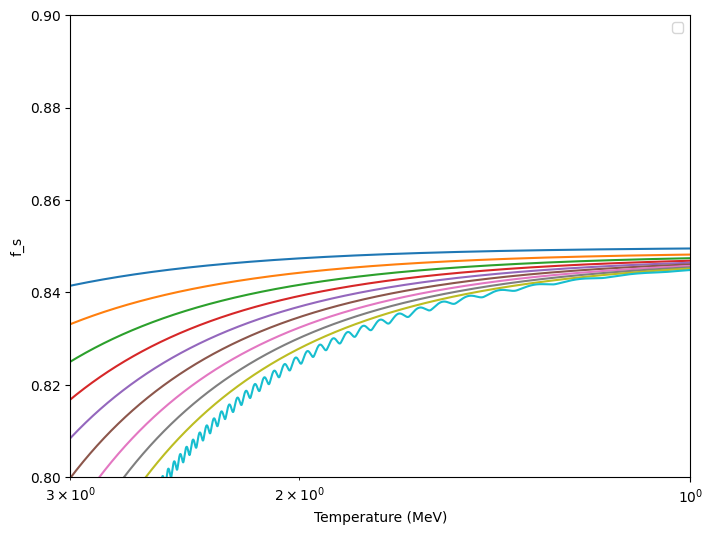

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


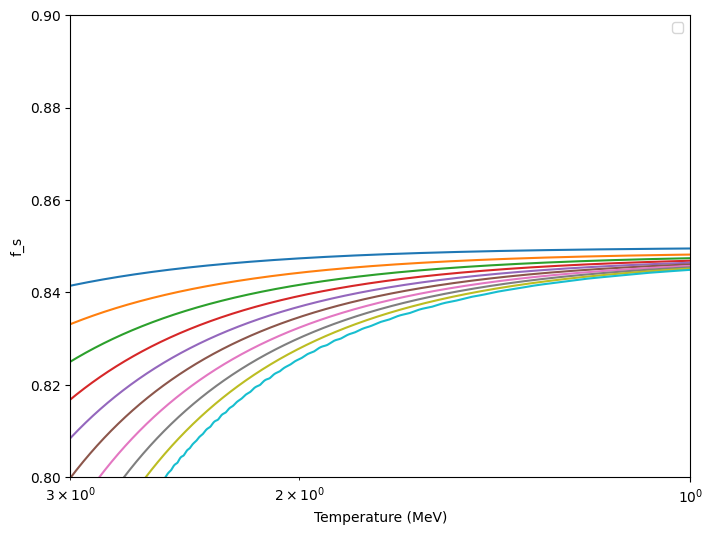

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


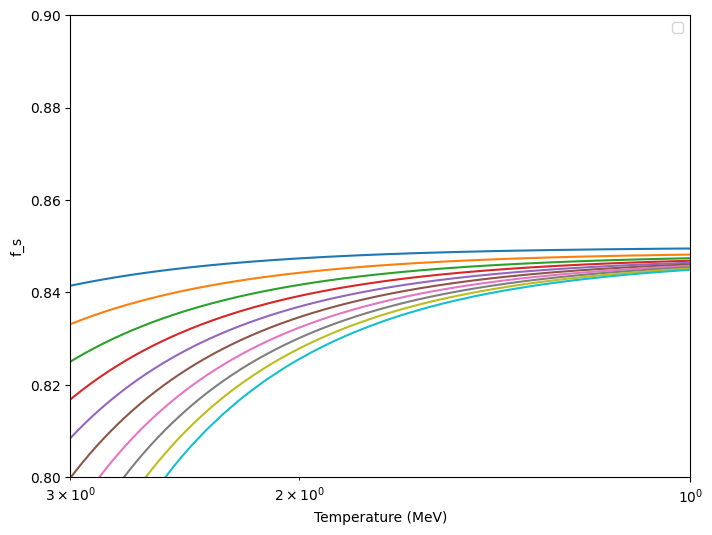

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


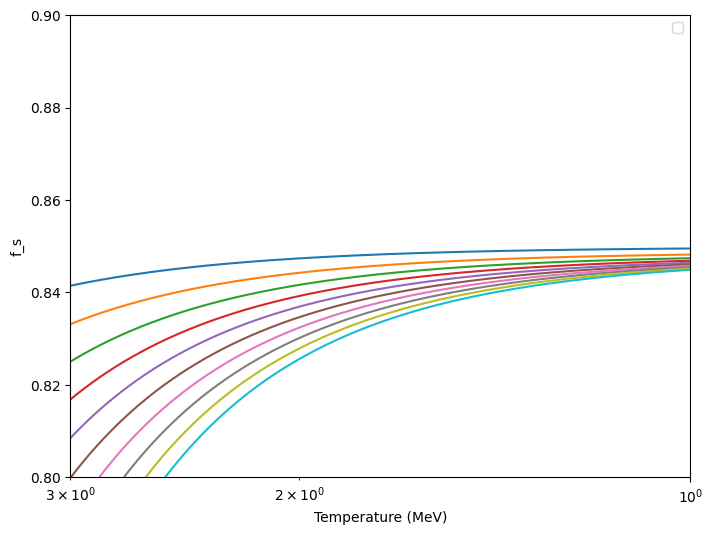

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


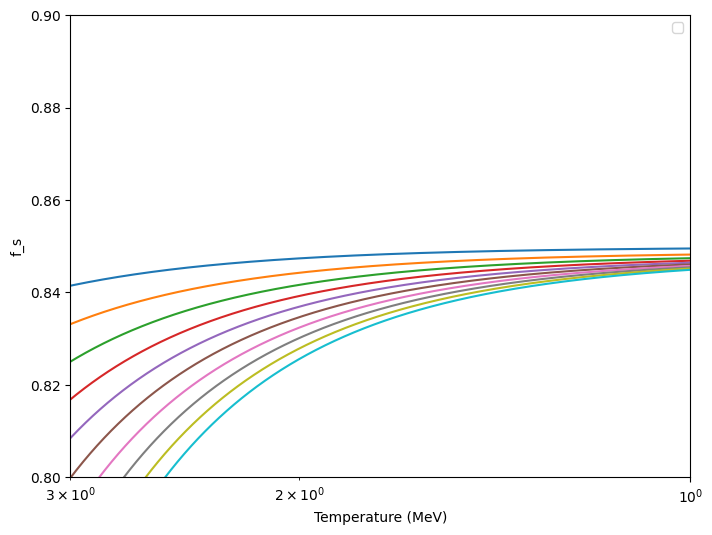

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


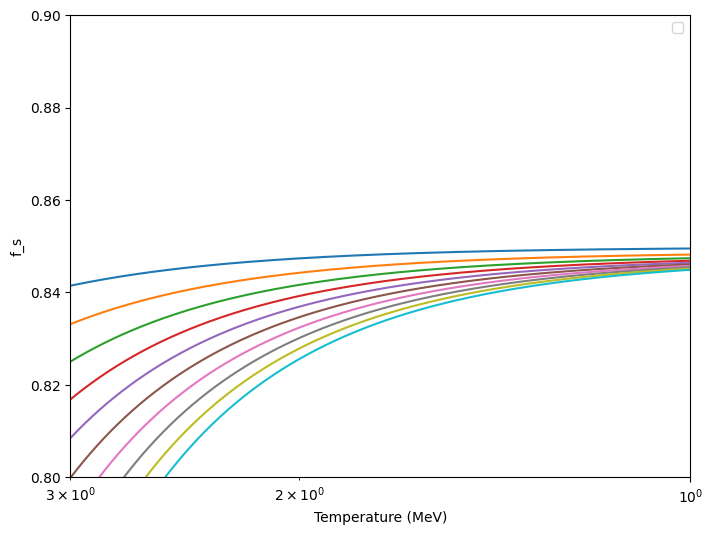

In [17]:
file_name1 = "/home/projects/sterilenuosc/results/dw_tol0.1.txt"
file_name2 = "/home/projects/sterilenuosc/results/dw_tol0.01.txt"
file_name3 = "/home/projects/sterilenuosc/results/dw_tol0.001.txt"
file_name4 = "/home/projects/sterilenuosc/results/dw_tol0.0001.txt"
file_name5 = "/home/projects/sterilenuosc/results/dw_tol1e-05.txt"
file_name6 = "/home/projects/sterilenuosc/results/dw_tol1e-06.txt"
stacked1 = np.loadtxt(file_name1)
stacked2 = np.loadtxt(file_name2)
stacked3 = np.loadtxt(file_name3)
stacked4 = np.loadtxt(file_name4)
stacked5 = np.loadtxt(file_name5)
stacked6 = np.loadtxt(file_name6)
stacked = np.stack([stacked1, stacked2, stacked3, stacked4, stacked5, stacked6])

nbins = (len(stacked1)-2) // 2
bins = np.linspace(3, 25, nbins)
xs = stacked[0,-1,:]
zs = stacked[:,-2,:]

colors = ['tab:gray', 'tab:brown', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink']

# j=0
for j in range(len(stacked)):
    plt.figure(figsize=(8,6))
    plt.xlim(3e0,1e0)
    plt.ylim(0.8, 0.9)

    for i in range(nbins):
        # P0s = stacked[j,4*i+1,:]
        # Pxs = stacked[j,4*i+2,:]
        # Pys = stacked[j,4*i+3,:]
        # Pzs = stacked[j,4*i+4,:]
        # plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color=colors[i])
        
        plt.semilogx(1e-6*m_e/xs, stacked[j,i,:])

    plt.legend(loc="best")
    plt.xlabel("Temperature (MeV)")
    plt.ylabel(r"f_s")
    plt.show()

In [2]:
import random
n=100000
start = time.time()
for _ in range(n):
    x = random.random()
    z = random.random() * 0.01 + 1
    dz = dz_dx(x, z)
print(time.time()-start)

start = time.time()
for _ in range(n):
    x = random.random()
    z = random.random() * 0.01 + 1
    dz = dz_dx_QED(x, z)
print(time.time()-start)

start = time.time()
y_arr = np.linspace(3, 25, 10)
f0 = f_0(y_arr)
dP0s = np.random.rand(10) + 1
integrand = np.power(y_arr, 3) * f0 * dP0s.flatten()
for _ in range(n):
    x = random.random()
    z = random.random() * 0.01 + 1
    dz = (x/z * J(x/z) + G1(x/z) - 1 / (2 *  np.pi ** 2 * z ** 3) * inte(y_arr, integrand)) \
    / (x/z * J(x/z) + Y(x/z) + G2(x/z) + 2 * np.pi ** 2 / 15) # replace with old dz/dx, should get identical result as before format change 
print(time.time()-start)


8.77749752998352
36.26143789291382
36.592106342315674


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


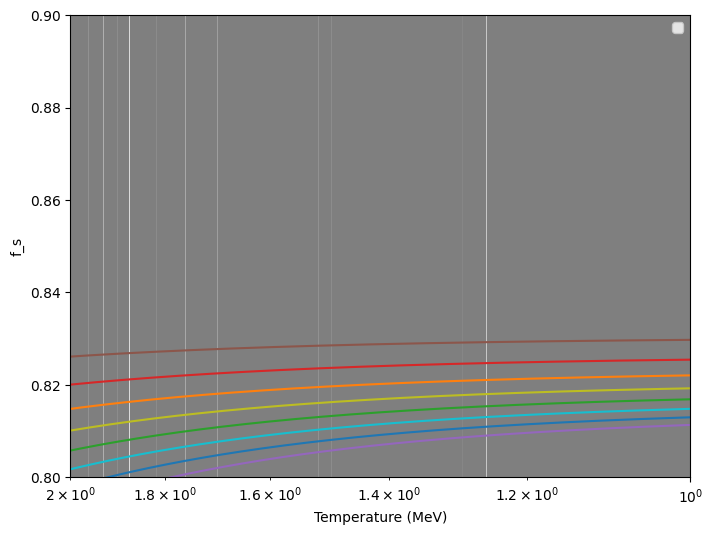

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


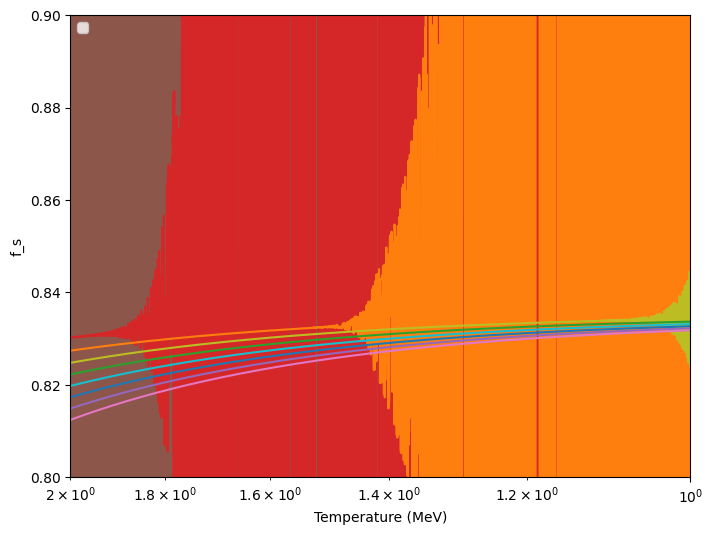

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


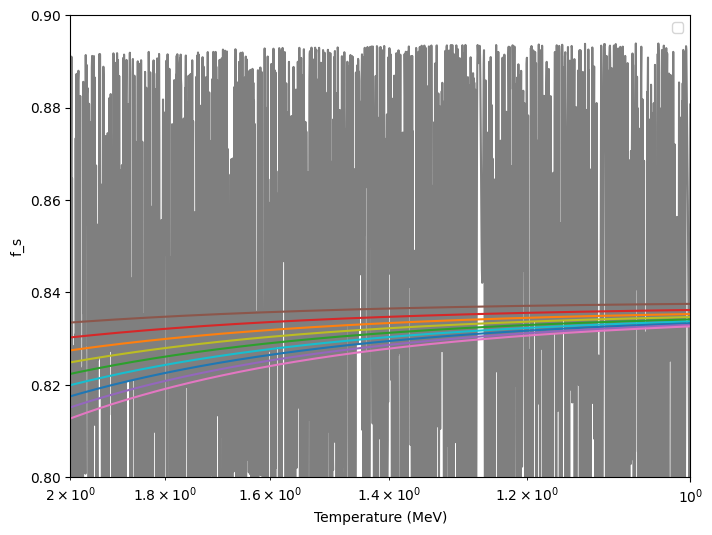

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


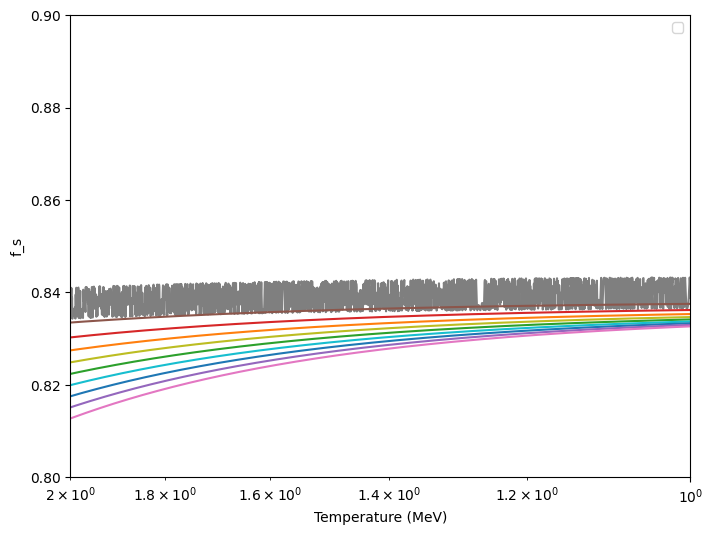

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


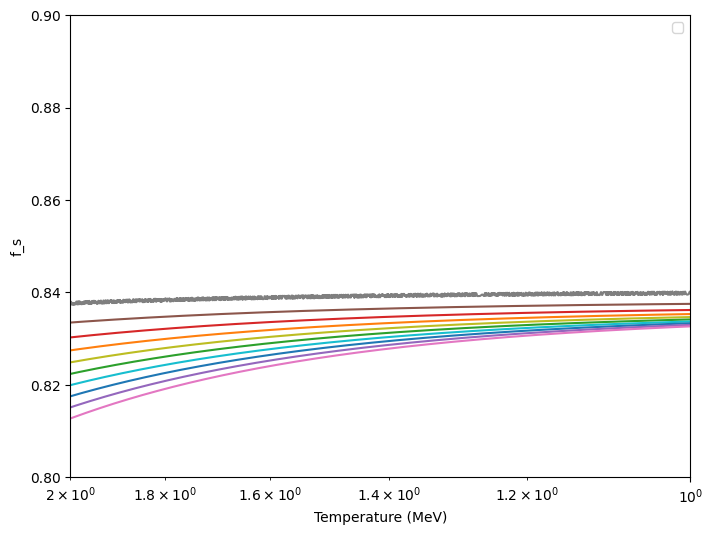

In [18]:
file_name1 = "/home/projects/sterilenuosc/results/olddzdx_factor1.0_tol0.01_7.09e-02_2.00e-01.txt"
file_name2 = "/home/projects/sterilenuosc/results/olddzdx_factor1.0_tol0.001_7.09e-02_2.00e-01.txt"
file_name3 = "/home/projects/sterilenuosc/results/olddzdx_factor1.0_tol0.0001_7.09e-02_2.00e-01.txt"
file_name4 = "/home/projects/sterilenuosc/results/olddzdx_factor1.0_tol1e-05_7.09e-02_2.00e-01.txt"
file_name5 = "/home/projects/sterilenuosc/results/olddzdx_factor1.0_tol1e-06_7.09e-02_2.00e-01.txt"
# file_name6 = "/home/projects/sterilenuosc/results/dw_gr3_bins10_tol1e-05.txt"
# file_name7 = "/home/projects/sterilenuosc/results/dw_gr3_bins10_tol1e-06.txt"
stacked1 = np.loadtxt(file_name1)
stacked2 = np.loadtxt(file_name2)
stacked3 = np.loadtxt(file_name3)
stacked4 = np.loadtxt(file_name4)
stacked5 = np.loadtxt(file_name5)
# stacked6 = np.loadtxt(file_name6)
# stacked7 = np.loadtxt(file_name7)
stacked = np.stack([stacked1, stacked2, stacked3, stacked4, stacked5]) #, stacked6, stacked7])

nbins = (len(stacked1)-2) // 4
bins = np.linspace(3, 25, nbins)
xs = stacked1[0,:]
zs = stacked[:,-1,:]

colors = ['tab:gray', 'tab:brown', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink']

# j=0
for j in range(len(stacked)):
    plt.figure(figsize=(8, 6))
    # plt.xlim([3e1,1e0])
    plt.xlim([2e0, 1e0])
    plt.ylim([0.8, 0.9])
    for i in range(nbins):    
        # fs = stacked[j,i,:]
        # fa = stacked[j,i+nbins,:]
        # plt.semilogx(1e-6*m_e/xs, fs, color=colors[i])

        P0s = stacked[j,4*i+1,:]
        Pxs = stacked[j,4*i+2,:]
        Pys = stacked[j,4*i+3,:]
        Pzs = stacked[j,4*i+4,:]

        plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color=colors[i])
    plt.legend(loc="best")
    plt.xlabel("Temperature (MeV)")
    plt.ylabel(r"f_s")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


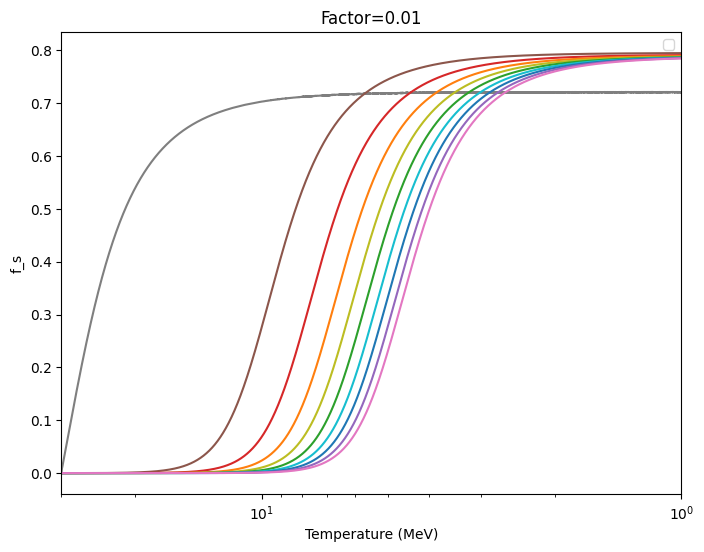

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


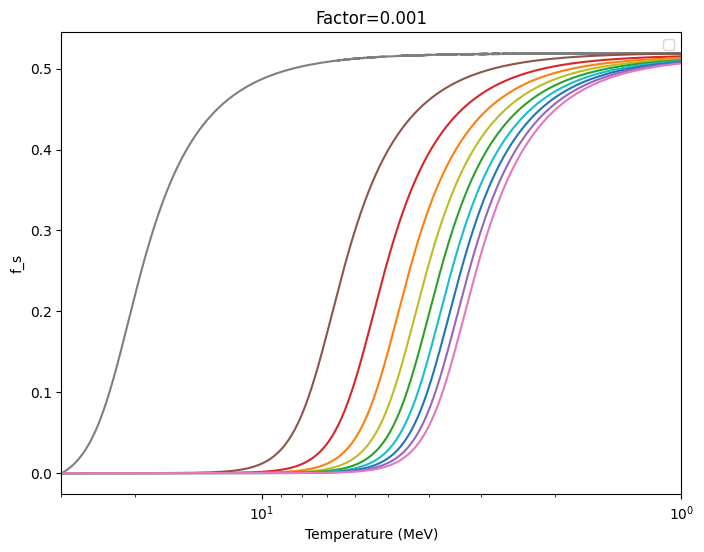

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


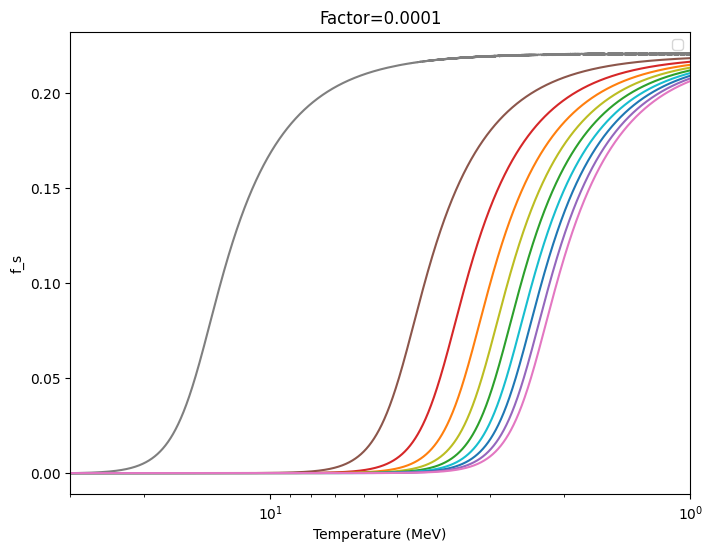

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


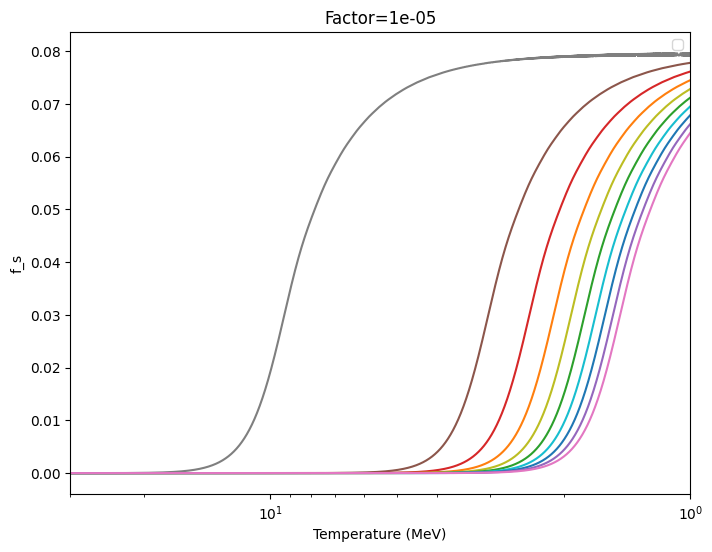

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


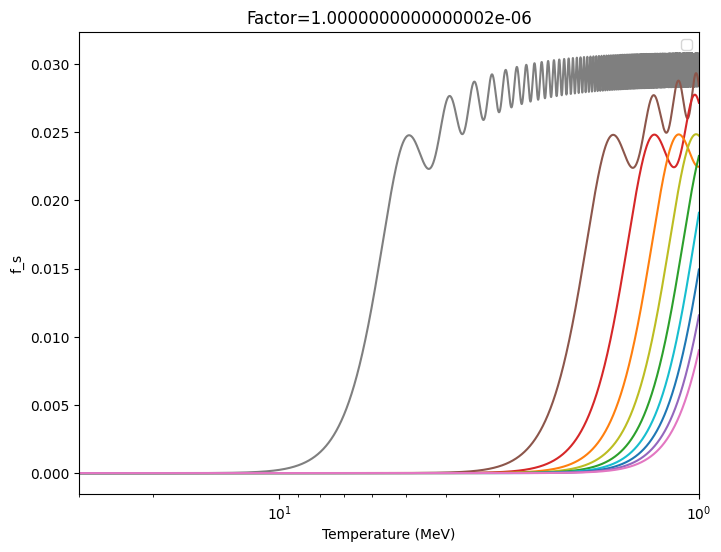

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


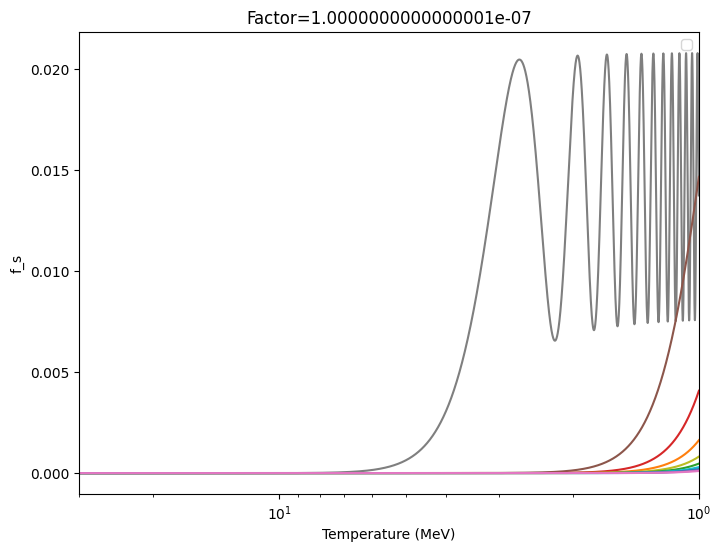

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


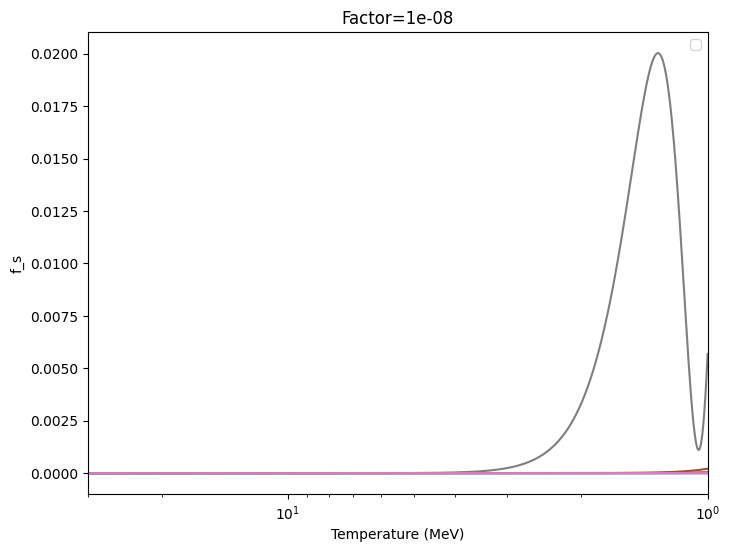

In [9]:
# file_name1 = "/home/projects/sterilenuosc/results/factor0.1_7.09e-02_2.00e-01.txt"
file_name2 = "/home/projects/sterilenuosc/results/factor0.01_7.09e-02_2.00e-01.txt"
file_name3 = "/home/projects/sterilenuosc/results/factor0.001_7.09e-02_2.00e-01.txt"
file_name4 = "/home/projects/sterilenuosc/results/factor0.0001_7.09e-02_2.00e-01.txt"
file_name5 = "/home/projects/sterilenuosc/results/factor1e-05_7.09e-02_2.00e-01.txt"
file_name6 = "/home/projects/sterilenuosc/results/factor1e-06_7.09e-02_2.00e-01.txt"
file_name7 = "/home/projects/sterilenuosc/results/factor1e-07_7.09e-02_2.00e-01.txt"
file_name8 = "/home/projects/sterilenuosc/results/factor1e-08_7.09e-02_2.00e-01.txt"
# stacked1 = np.loadtxt(file_name1)
stacked2 = np.loadtxt(file_name2)
stacked3 = np.loadtxt(file_name3)
stacked4 = np.loadtxt(file_name4)
stacked5 = np.loadtxt(file_name5)
stacked6 = np.loadtxt(file_name6)
stacked7 = np.loadtxt(file_name7)
stacked8 = np.loadtxt(file_name8)
stacked = np.stack([stacked2, stacked3, stacked4, stacked5, stacked6, stacked7, stacked8])

nbins = (len(stacked[0])-2) // 4
bins = np.linspace(3, 25, nbins)
xs = stacked[0, 0,:]
zs = stacked[:,-1,:]

colors = ['tab:gray', 'tab:brown', 'tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink']

# j=0
for j in range(len(stacked)):
    plt.figure(figsize=(8, 6))
    plt.xlim([3e1,1e0])
    # plt.ylim([0.8, 0.9])
    for i in range(nbins):    
        # fs = stacked[j,i,:]
        # fa = stacked[j,i+nbins,:]
        # plt.semilogx(1e-6*m_e/xs, fs, color=colors[i])

        P0s = stacked[j,4*i+1,:]
        Pxs = stacked[j,4*i+2,:]
        Pys = stacked[j,4*i+3,:]
        Pzs = stacked[j,4*i+4,:]

        plt.semilogx(1e-6*m_e/xs, (P0s-Pzs)/2, color=colors[i])
    plt.legend(loc="best")
    plt.xlabel("Temperature (MeV)")
    plt.ylabel(r"f_s")
    plt.title(f"Factor={1e-2 * 10 ** -j}")
    plt.show()

/home/projects/sterilenuosc/multi_momentum/constants_functions.py:86: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, err = quad(intJ, 0, 50, args=(t))
/home/projects/sterilenuosc/multi_momentum/constants_functions.py:103: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, err = quad(intj, 0, 50, args=(t))


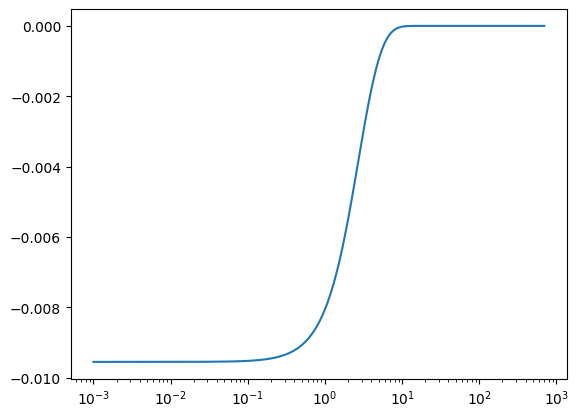

In [8]:
tau = np.logspace(-3, 3, 1000)
plt.semilogx(tau, [G2(t) for t in tau])

In [1]:
from scipy.interpolate import CubicSpline
def interpolate(newspan, span, f):
    interpolator = CubicSpline(span, f)
    return interpolator(newspan)

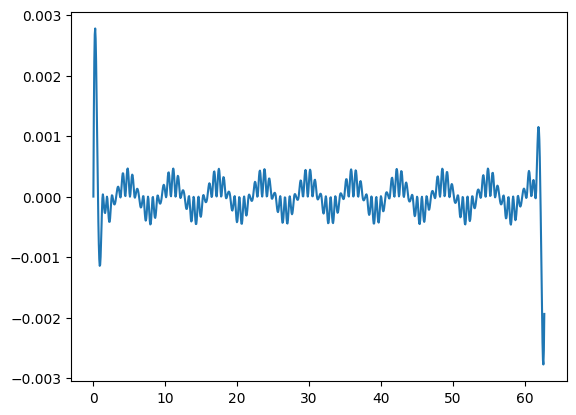

In [21]:
x = np.linspace(0, 20*np.pi, 100)
y = np.sin(x)

newx = np.linspace(0, 20*np.pi-0.1, 1000)
# plt.plot(x, y)
plt.plot(newx, interpolate(newx, x, y)-np.sin(newx))

0.017033298337255396 0.5080065662802407


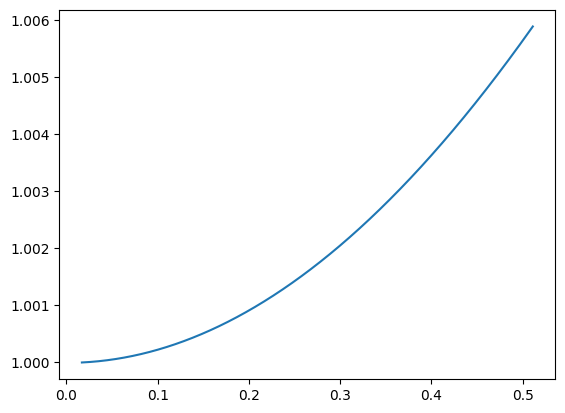

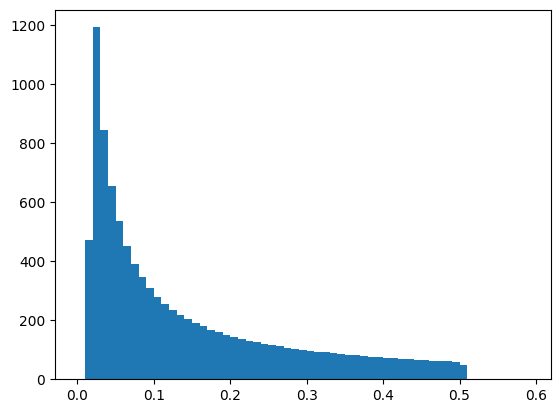

In [14]:
file_name1 = "/home/projects/sterilenuosc/results/factor0.1_7.09e-02_2.00e-01.txt"
stacked1 = np.loadtxt(file_name1)

xs = stacked1[0,:]
zs = stacked1[-1,:]

print(np.min(xs/zs), np.max(xs/zs))

plt.plot(xs, zs)
plt.show()
plt.hist(xs/zs, bins=np.arange(0, 0.6, 0.01))
plt.show()

0.27915024757385254
0.0007755756378173828
0.6379318237304688
0.2087700366973877


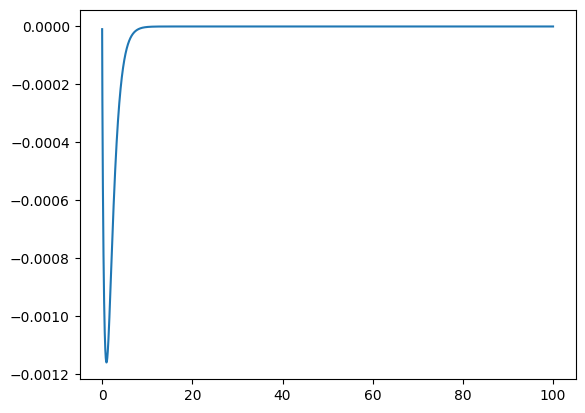

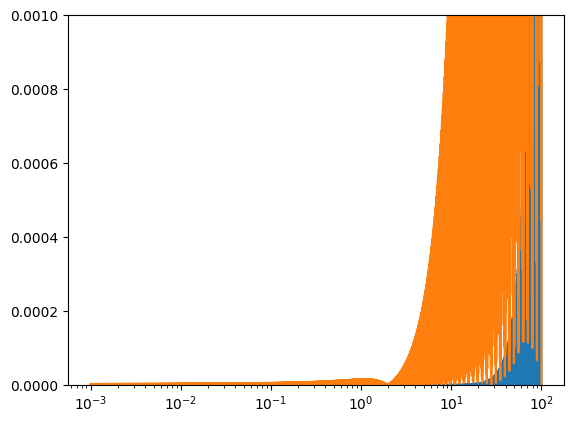

In [13]:
func = G1
# from constants_functions import interpolate
interpolate = np.interp

start = time.time()
sparsetau = np.logspace(-3, 2, 1000)
Jprime = np.array([J_prime(t) for t in sparsetau])
Kprime = np.array([K_prime(t) for t in sparsetau])
Jay = np.array([J(t) for t in sparsetau])
Kay = np.array([K(t) for t in sparsetau])
samples = func(sparsetau, Jprime, Kprime, Jay, Kay)
print(time.time()-start)

densetau = np.logspace(-3, 2, 100000)

start = time.time()
_ = interpolate(densetau, sparsetau, samples)
print(time.time()-start)

from scipy.interpolate import CubicSpline
start=time.time()
interpolator = CubicSpline(sparsetau, samples)
interpolatedcubic = np.array([interpolator(t) for t in densetau])
print(time.time()-start)

start = time.time()
interpolatedlinear = np.array([interpolate(t, sparsetau, samples) for t in densetau])
print(time.time()-start)

# start = time.time()
# Jprime = np.array([J_prime(t) for t in densetau])
# Kprime = np.array([K_prime(t) for t in densetau])
# Jay = np.array([J(t) for t in densetau])
# Kay = np.array([K(t) for t in densetau])
# true = func(densetau, Jprime, Kprime, Jay, Kay)
# print(time.time()-start)

# plt.semilogx(densetau, interpolated)
plt.plot(densetau, true)
plt.show()
plt.ylim(top=1e-3)
plt.semilogx(densetau, np.abs(interpolatedcubic/true-1))
plt.semilogx(densetau, np.abs(interpolatedlinear/true-1))
plt.show()

In [ ]:
# run dw and precession for two sets of dm2, theta
# multiply dm2 by 10

0.836277437010548 0.835795904795583 0.8032866310993144
0.8325456800591762 0.8321066184957187 0.7992550716462152
0.8306945205635979 0.8302525659151008 0.7972181723977259
0.8295579851421272 0.8291141513115354 0.7959560441862031
0.8287582916339812 0.8283130634964812 0.7950601136891572
0.828139657624681 0.8276932840521002 0.7943603894898765
0.8276275564956697 0.827180174507965 0.7937755464238019
0.8271824100138219 0.8267340996580912 0.793262533431898
0.8267815001202488 0.8263323104640853 0.7927967420990096
0.8264109761572831 0.8259609384498069 0.7923632334761591


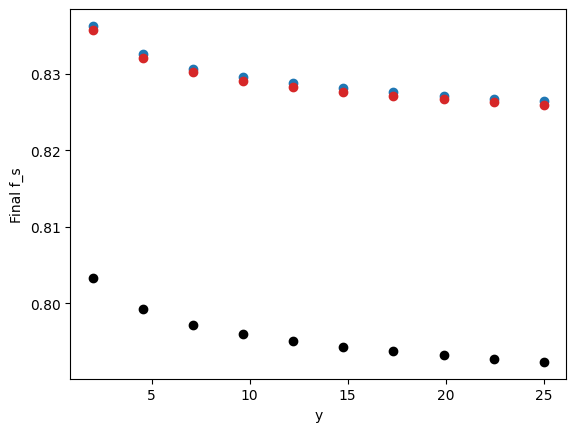

In [6]:
file_name = "/home/projects/sterilenuosc/results/comparison_precession_7.09e-02_2.00e-01.txt"
file_name2 = "/home/projects/sterilenuosc/results/factor0.1_precession_7.09e-02_2.00e-01.txt"
file_name3 = "/home/projects/sterilenuosc/results/factor0.01_precession_7.09e-02_2.00e-01.txt"
stacked = np.loadtxt(file_name)
stacked2 = np.loadtxt(file_name2)
stacked3 = np.loadtxt(file_name3)
nbins = (len(stacked)-2) // 4
bins = np.linspace(2, 25, nbins)

for i in range(nbins):
    fs = 0.5*(stacked[4*i+1,:]-stacked[4*i+4,:])
    fs2 = 0.5*(stacked2[4*i+1,:]-stacked2[4*i+4,:])
    fs3 = 0.5*(stacked3[4*i+1,:]-stacked3[4*i+4,:])

    print(np.mean(fs[-100:]), np.mean(fs2[-100:]), np.mean(fs3[-100:]))
    plt.scatter(bins[i], np.mean(fs[-100:]), color='tab:blue')
    plt.scatter(bins[i], np.mean(fs2[-100:]), color='tab:red')
    plt.scatter(bins[i], np.mean(fs3[-100:]), color='k')
plt.ylabel(r"Final f_s")
plt.xlabel("y")
plt.show()

In [ ]:
# plot oscillation frequency as function of time, compare to collision rate
# total hamiltonian is a vector, plot norm of Hamiltonian
# use gamma_e for collision rate
# either calculate based on full sterile/no sterile assuption
# or recalculate based on P0, Pz from run

# check: l dominates at small x, b dominates (and constant)
# l should cease dominating at the same time as sterile production

# exercise: write b and l by hand, calculate dependence on y

In [3]:
theta0 = 0.5 * np.arcsin(np.sqrt(0.02))
dm2 = 2e-1

def H(x, P0_arr, z):
    rho = (2 * rho_e(x, z) + rho_nu(y_arr, P0_arr) + rho_gamma(z)) * (m_e/x) ** 4
    a = np.sqrt(rho/3)
    return a / (m_Pl)

def l(x, z, H_x): # nondimensionalize 
    const = 2 * np.sqrt(2) * G_F / (x * H_x) * 1 * (m_e / x) ** 5 / (m_W ** 2)
    var = 2 * (rho_e(x, z) + P_e(x, z))
    return np.array([0, 0, -var * const])

def b(x, H_x): # constant (vacuum term)
    theta = theta0
    const = dm2 / (x * H_x) * (x / m_e) / (2 * 1)
    return const * np.array([np.sin(2*theta), 0, -np.cos(2*theta)])

def Gamma_e(x, z):
    return C_e * G_F ** 2 * 1 * (m_e/x) ** 5 * z ** 5

In [29]:
file_name = "/home/projects/sterilenuosc/results/comparison_precession_7.09e-02_2.00e-01.txt"
stacked = np.loadtxt(file_name)
nbins = (len(stacked)-2) // 4
y_arr = np.linspace(2, 25, nbins)
y = 3.15

xs = stacked[0,:]
zs = stacked[-1,:]
P0s = stacked[np.arange(1, nbins*4+1, 4),:]

In [56]:
hubs = []
Bs = []
Ls = []
Gammaes = []
for i in range(len(xs)):
    x = xs[i]
    z = zs[i]
    P0 = P0s[:,i]
    hub = H(x, P0, z)
    hubs.append(hub)
    Bs.append(np.linalg.norm(b(x, hub)/y))
    Ls.append(np.linalg.norm(l(x, z, hub)*y))
    Gammaes.append(Gamma_e(x, z))
hubs = np.array(hubs)
Bs = np.array(Bs)
Ls = np.array(Ls)
Gammaes = np.array(Gammaes)

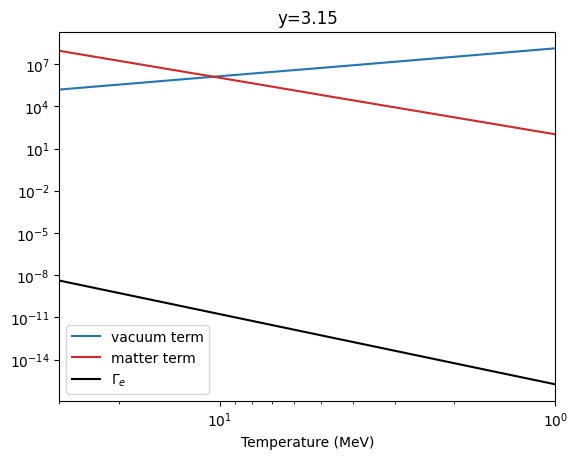

In [67]:
plt.xlim([3e1, 1e0])
# plt.ylim([-1e3, 1e3])
# plt.semilogx(1e-6*m_e/xs, hubs)
plt.loglog(1e-6*m_e/xs, Bs, color='tab:blue', label='vacuum term')
plt.loglog(1e-6*m_e/xs, Ls, color='tab:red', label='matter term')
plt.semilogx(1e-6*m_e/xs, Gammaes, color='k', label=r'$\Gamma_e$')
plt.xlabel("Temperature (MeV)")
plt.title("y=3.15")
plt.legend()
plt.show()

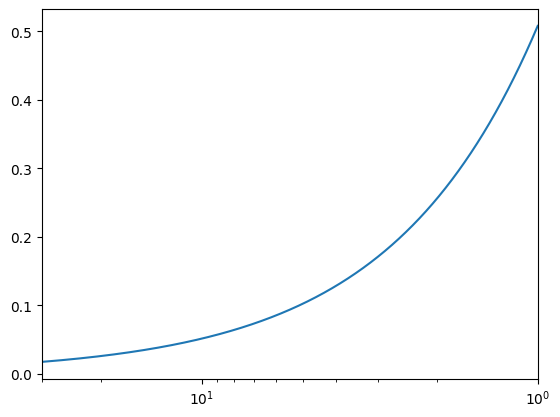

In [46]:
plt.xlim([3e1, 1e0])
# plt.ylim([-1e3, 1e3])
plt.semilogx(1e-6*m_e/xs, xs/zs)
# plt.semilogx(1e-6*m_e/xs, Bs, color='tab:blue')
# plt.semilogx(1e-6*m_e/xs, Ls, color='tab:red')
# plt.semilogx(1e-6*m_e/xs, Gammaes, color='k')
plt.show()

In [49]:
print(rho_e(0.017, 1))
print(rho_e(0.5, 1))

0.5757148792855892
0.5648998632098929
